In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [7]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

gender doesnt matter to predict the salary, so dropping the gender column

In [8]:
data_modify=data.drop(['sex'],axis=1)

data_modify

,rank,discipline,yrs.since.phd,yrs.service,salary
0,Prof,B,19,18,139750
1,Prof,B,20,16,173200
2,AsstProf,B,4,3,79750
3,Prof,B,45,39,115000
4,Prof,B,40,41,141500
...,...,...,...,...,...
392,Prof,A,33,30,103106
393,Prof,A,31,19,150564
394,Prof,A,42,25,101738
395,Prof,A,25,15,95329


In [9]:
data_modify.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [10]:
data_modify.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [11]:
data_modify.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
salary           0
dtype: int64

In [12]:
data_modify.shape

(397, 5)

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x=data_modify.drop(['salary'],axis=1)
y=data_modify
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=40)

In [15]:
x_train.head()

,rank,discipline,yrs.since.phd,yrs.service
221,Prof,B,23,10
258,AsstProf,A,9,3
49,AsstProf,B,1,1
54,AssocProf,B,12,11
151,AsstProf,B,4,4


In [16]:
y_train.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
221,Prof,B,23,10,145200
258,AsstProf,A,9,3,73800
49,AsstProf,B,1,1,70768
54,AssocProf,B,12,11,103760
151,AsstProf,B,4,4,92000


In [17]:
data_modify.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
salary            int64
dtype: object

In [18]:
data_modify['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [19]:
data_modify['rank'].nunique()

3

In [20]:
data_modify['discipline'].unique()

array(['B', 'A'], dtype=object)

In [21]:
data_modify['discipline'].nunique()

2

# data is catagorical

making data as nominal

In [22]:
data_modify_visualization=data_modify[['rank','discipline']].copy()

In [23]:
data_modify_visualization.columns

Index(['rank', 'discipline'], dtype='object')

In [24]:
import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


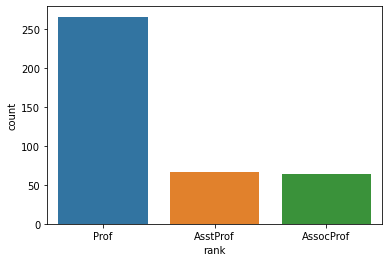

In [25]:
ax=sns.countplot(x='rank', data=data_modify_visualization)
print(data_modify_visualization['rank'].value_counts())

B    216
A    181
Name: discipline, dtype: int64


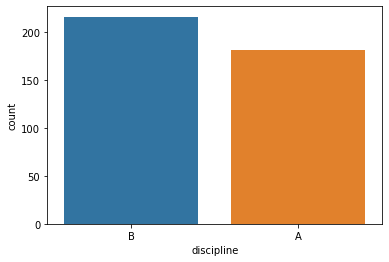

In [26]:
ax=sns.countplot(x='discipline', data=data_modify_visualization)
print(data_modify_visualization['discipline'].value_counts())

In [27]:
data_modify_visualcontinuos=data_modify[['yrs.since.phd','yrs.service','salary']].copy()

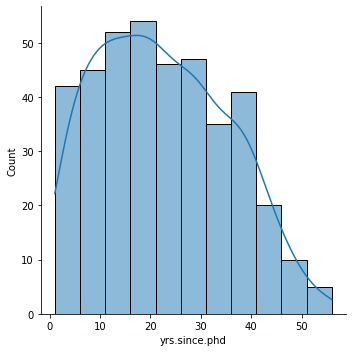

In [28]:
sns.displot(data_modify_visualcontinuos['yrs.since.phd'], kde=True)

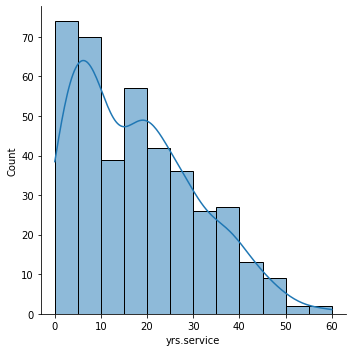

In [29]:
sns.displot(data_modify_visualcontinuos['yrs.service'], kde=True)

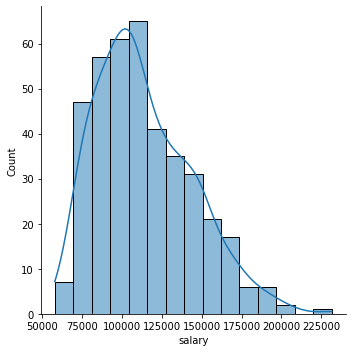

In [30]:
sns.displot(data_modify_visualcontinuos['salary'], kde=True)

encoding dataframe to convert string into numerical format

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [32]:
for i in data_modify.columns:
    if(data_modify[i].dtypes=='object'):
        data_modify[i]=enc.fit_transform(data_modify[i].values.reshape(-1,1))

In [33]:
data_modify

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19,18,139750
1,2.0,1.0,20,16,173200
2,1.0,1.0,4,3,79750
3,2.0,1.0,45,39,115000
4,2.0,1.0,40,41,141500
...,...,...,...,...,...
392,2.0,0.0,33,30,103106
393,2.0,0.0,31,19,150564
394,2.0,0.0,42,25,101738
395,2.0,0.0,25,15,95329


In [34]:
data_modify.describe()


,rank,discipline,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,113706.458438
std,0.757486,0.498682,12.887003,13.006024,30289.038695
min,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,231545.000000


<AxesSubplot:>

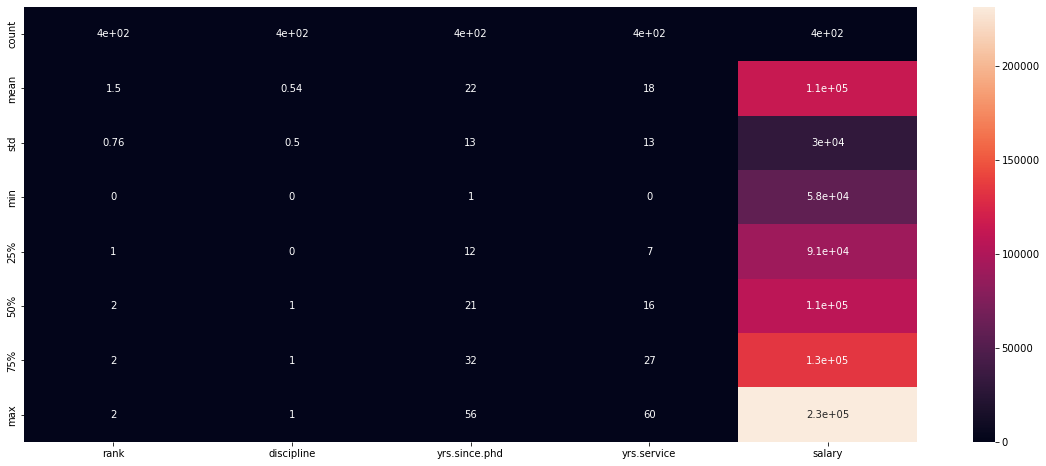

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.heatmap(data_modify.describe(), annot=True)

In [36]:
data_modify.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

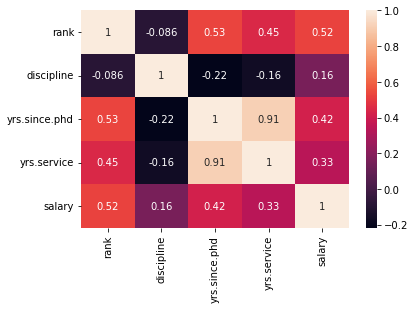

In [37]:
sns.heatmap(data_modify.corr(), annot=True)

In [38]:
data_modify.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [39]:
data_modify.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
salary             int64
dtype: object

checking outliers on float and int types through boxplot

<AxesSubplot:>

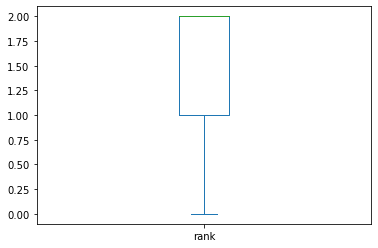

In [40]:
data_modify['rank'].plot.box()

<AxesSubplot:>

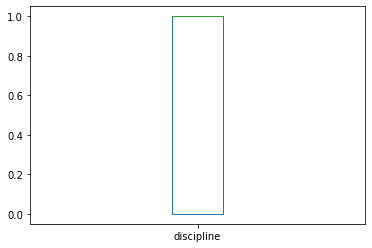

In [41]:
data_modify['discipline'].plot.box()

<AxesSubplot:>

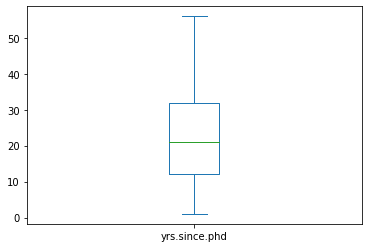

In [42]:
data_modify['yrs.since.phd'].plot.box()

<AxesSubplot:>

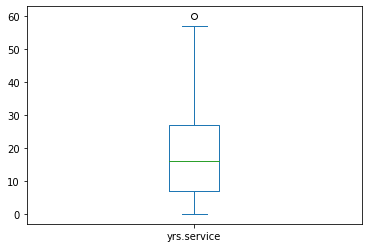

In [43]:
data_modify['yrs.service'].plot.box()

<AxesSubplot:>

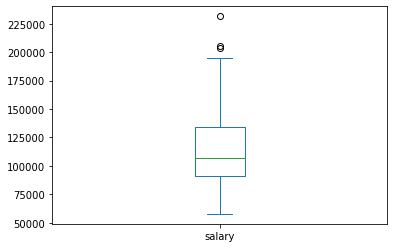

In [44]:
data_modify['salary'].plot.box()

cateorical columns and target columns we not remove the outliers 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [46]:
x=data_modify.drop(['salary'],axis=1)
y=data_modify
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=40)

In [47]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [48]:
y_train_predict=lr.predict(x_train)
y_train_predict

array([[2.00000000e+00, 1.00000000e+00, 2.30000000e+01, 1.00000000e+01,
        1.33844155e+05],
       [1.00000000e+00, 2.91368135e-15, 9.00000000e+00, 3.00000000e+00,
        9.01890025e+04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        9.76615340e+04],
       ...,
       [2.00000000e+00, 1.00000000e+00, 4.50000000e+01, 4.50000000e+01,
        1.39017221e+05],
       [2.00000000e+00, 1.00000000e+00, 1.30000000e+01, 1.10000000e+01,
        1.21635724e+05],
       [2.00000000e+00, 1.00000000e+00, 2.30000000e+01, 1.50000000e+01,
        1.30929440e+05]])

In [49]:
accuracy_train=r2_score(y_train, y_train_predict)
accuracy_train

0.8752481939925136

In [50]:
y_test_predict=lr.predict(x_test)
y_test_predict

array([[ 2.00000000e+00,  9.34577670e-16,  1.90000000e+01,
         1.10000000e+01,  1.13003982e+05],
       [ 2.00000000e+00, -3.04831975e-16,  2.00000000e+01,
         1.80000000e+01,  1.10085929e+05],
       [ 2.00000000e+00,  1.00000000e+00,  2.60000000e+01,
         1.90000000e+01,  1.32085314e+05],
       [ 2.00000000e+00, -1.53753442e-15,  3.00000000e+01,
         2.30000000e+01,  1.18796701e+05],
       [ 1.00000000e+00,  3.44417570e-15,  4.00000000e+00,
         1.00000000e+00,  8.55421450e+04],
       [ 2.00000000e+00,  1.00000000e+00,  2.50000000e+01,
         1.80000000e+01,  1.31505708e+05],
       [ 2.00000000e+00,  1.00000000e+00,  2.60000000e+01,
         2.20000000e+01,  1.30336485e+05],
       [ 2.00000000e+00,  1.00000000e+00,  2.30000000e+01,
         2.10000000e+01,  1.27431781e+05],
       [ 2.00000000e+00,  1.00000000e+00,  4.00000000e+01,
         2.70000000e+01,  1.43697452e+05],
       [ 2.00000000e+00,  1.00000000e+00,  3.40000000e+01,
         3.30000000e+01

In [51]:
accuracy_test=r2_score(y_test, y_test_predict)
accuracy_test

0.8713542363244811

checking underfitting and overfitting

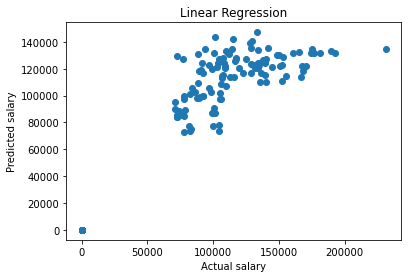

In [52]:
plt.scatter(x=y_test, y=y_test_predict)
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.title('Linear Regression')
plt.show()


regularization

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10],
            'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


final model training after finding best alpha

In [55]:
ls=Lasso(alpha=0.0001, random_state=0)
ls.fit(x_train, y_train)
ls_score_training=ls.score(x_train, y_train)
pred_ls=ls.predict(x_test)
ls_score_training *100

87.56573380191028

In [56]:
lss=r2_score(y_test, pred_ls)
lss*100

86.93872611687262

In [57]:
import pickle
filename='salary.pkl'
pickle.dump(lr, open(filename,'wb'))

In [58]:
loaded_model=pickle.load(open('salary.pkl', 'rb'))
result=loaded_model.score(x_test, y_test)
print(result*100)

87.13542363244811
